# Capstone Project - Road Accident Severity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

.

*Downloading the CSV File*

In [3]:
!wget -O Data_Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-05 16:37:03--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data_Collisions.csv’

Data_Collisions.csv 100%[===================>]  70.49M  20.6MB/s    in 3.5s    

2020-09-05 16:37:07 (20.0 MB/s) - ‘Data_Collisions.csv’ saved [73917638/73917638]



In [ ]:
data = pd.read_csv("Data_Collisions.csv")

pd.options.display.max_columns = None
data.head(2)

*Examining the Dataset, the Machine learning Model will be useful for predicting the severity of Accident*

Hence, useful Feature for extraction of Data is **JUNCTIONTYPE, PERSONCOUNT, VEHCOUNT, WEATHER, ROADCOND, LIGHTCOND, SPEEDING**

*The Accident data provided is From Seattle Department of Transportation, hence we would like to locate the accident spots in the map to get abetter feel of the data*

In [5]:
import folium
seattle_map = folium.Map(location=[47.60, -122.35], zoom_start=10)
seattle_map

The size of data is 194673 records as shown below; out of which we would locate 500 spots in the map

In [6]:
data.shape

(194673, 38)

In [7]:
data500 = data.iloc[0:500,:]
data500['X'] = data500['X'].fillna(0)
data500['Y'] = data500['Y'].fillna(0)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
accidents = folium.map.FeatureGroup()

for lat, lng, in zip(data500.Y, data500.X):
        accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(accidents)

Exploring the Feature set of the Data

<AxesSubplot:>

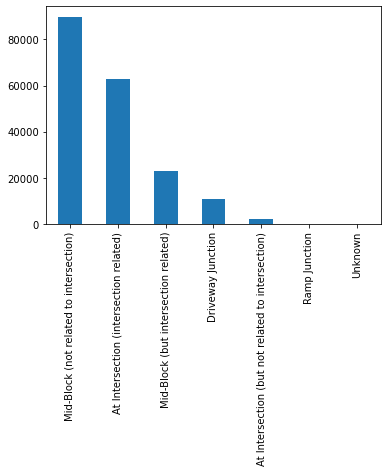

In [9]:
result = data['JUNCTIONTYPE'].value_counts()
import matplotlib as plt
result.plot(kind='bar')

<AxesSubplot:>

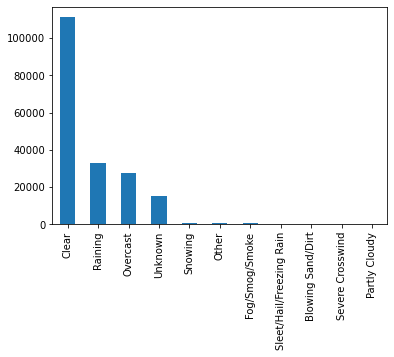

In [77]:
result = data['WEATHER'].value_counts()
import matplotlib as plt
result.plot(kind='bar')

<AxesSubplot:>

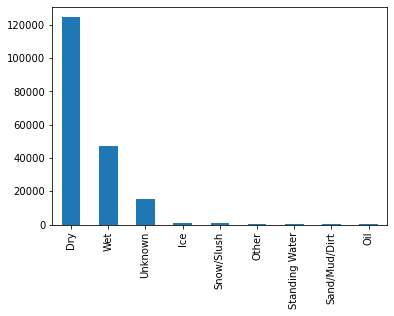

In [78]:
result = data['ROADCOND'].value_counts()
import matplotlib as plt
result.plot(kind='bar')

<AxesSubplot:>

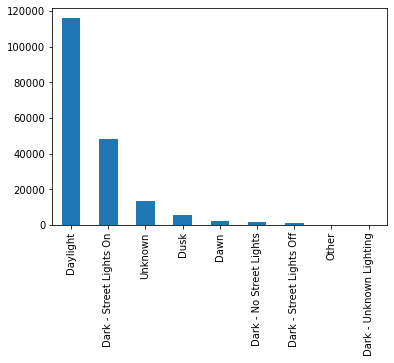

In [79]:
result = data['LIGHTCOND'].value_counts()
import matplotlib as plt
result.plot(kind='bar')

Based on the Exploratory analysis made above, we see that most accidents have occured during daylight, dry road, clear weather but in Mid-Block(not related to intersection)

This gives us an indication that all variables together should give an indication of the severity of the accident

In [80]:
data['SEVERITYCODE'].unique()

array([2, 1])

Further, the label values available in the dataset is only for Severity Codes 1 & 2; Hence our model's **prediction limit** is confined to these to severity codes only

In [15]:

data.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


## Preprocessing Data

In [11]:
#Extracting the required feature set
dataset = data[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

In [12]:
dataset.head(2)

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
1,1,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN


In [13]:
dataset.shape

(194673, 8)

In [14]:
dataset['SPEEDING'] = dataset['SPEEDING'].fillna(0)
dataset['SPEEDING'] = dataset['SPEEDING'].replace('Y',1) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
dataset['SPEEDING'].describe()

count    194673.000000
mean          0.047942
std           0.213644
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SPEEDING, dtype: float64

In [16]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['JUNCTIONTYPE']),pd.get_dummies(dataset['WEATHER']),pd.get_dummies(dataset['ROADCOND']),pd.get_dummies(dataset['LIGHTCOND'])], axis=1)

In [17]:
dataset.head(2)

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [21]:
dataset.drop(['Unknown','Other','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND'],axis=1,inplace=True)

In [22]:
dataset.head(2)

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [23]:
dataset['SEVERITYCODE'] = dataset['SEVERITYCODE'].astype(str)

In [24]:
dataset['SEVERITYCODE'].describe()

count     194673
unique         2
top            1
freq      136485
Name: SEVERITYCODE, dtype: object

## Model Building & Training

For Training the Dataset, initially we would begin with selecting first 30,000 records. This is due to the fact, loading the entire dataset into the model would take hours to process in KNN and SVM algorithms

In [25]:
dataset_training = dataset.iloc[0:30000,:]
print(dataset_training.shape)

(30000, 33)


In [26]:
Feature = dataset_training
label = dataset_training['SEVERITYCODE'].values
Feature.head(2)

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [27]:
Feature.drop(['SEVERITYCODE'],axis=1,inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Normalization

In [28]:
X_main = preprocessing.StandardScaler().fit(Feature).transform(Feature)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [29]:
X_main

array([[-0.39772389,  0.04107282, -0.23985331, ..., -0.11205218,
         0.77691187, -0.18674929],
       [-0.39772389,  0.04107282, -0.23985331, ..., -0.11205218,
        -1.28714729, -0.18674929],
       [ 1.08798357,  1.87468069, -0.23985331, ..., -0.11205218,
         0.77691187, -0.18674929],
       ...,
       [-0.39772389,  0.04107282, -0.23985331, ..., -0.11205218,
        -1.28714729, -0.18674929],
       [-1.14057761, -1.79253506, -0.23985331, ..., -0.11205218,
        -1.28714729, -0.18674929],
       [-1.14057761, -1.79253506, -0.23985331, ..., -0.11205218,
        -1.28714729, -0.18674929]])

In [30]:
print(X_main.shape)
print(label.shape)


(30000, 32)
(30000,)


*Splitting the dataset into Training Dataset and Testing Dataset by **80:20** Split*

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_main, label, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 32) (24000,)
Test set: (6000, 32) (6000,)


**K - Nearest Neighbour Classifciation Algorithm**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [82]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train set Accuracy:  0.7368333333333333


In [35]:
yhatknn = neigh.predict(X_test)

In [36]:
np.unique(yhatknn)

array(['1', '2'], dtype=object)

In [37]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatknn))

Test set Accuracy:  0.7236666666666667


*After running the code for K=7, 8, 9, 10; we get best accuracy for *K = 10** 

**Decision Tree Classifier**

In [38]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
predTree = Tree.predict(X_test)

In [42]:
np.unique(predTree)

array(['1', '2'], dtype=object)

In [43]:
predTree.shape

(6000,)

**Support Vector Machine**

In [44]:
from sklearn import svm
vector = svm.SVC(kernel='rbf')
vector.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
predvector = vector.predict(X_test)

In [46]:
predvector.shape

(6000,)

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
predLR = LR.predict(X_test)

In [49]:
predLR

array(['1', '2', '1', ..., '1', '1', '1'], dtype=object)

In [50]:
pred_prob = LR.predict_proba(X_test)
pred_prob

array([[0.857419  , 0.142581  ],
       [0.48729229, 0.51270771],
       [0.80051185, 0.19948815],
       ...,
       [0.66376891, 0.33623109],
       [0.67796421, 0.32203579],
       [0.80051185, 0.19948815]])

## Model Evaluation

In [51]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

##### For Evaluating the Model, we take last 4000 records from the SDOT dataset, which was not part of the Training Dataset

In [52]:
dataset_test = dataset.iloc[190673:194673,:]
dataset_test.shape

(4000, 33)

In [53]:
test_Y = dataset_test['SEVERITYCODE']

In [54]:
Feature_test = dataset_test
Feature_test.drop(['SEVERITYCODE'],axis=1,inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
# Normalizing the Test Dataset
test_X= preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Obtaining Jaccard, F1-score and Logloss for the Models

In [56]:
from sklearn.metrics import precision_recall_fscore_support, log_loss
#models
KNN_mod = neigh.predict(test_X)
DT_mod = Tree.predict(test_X)
SVM_mod = vector.predict(test_X)
LOGR_mod = LR.predict(test_X)
LOGR_prob = LR.predict_proba(test_X)

models = ['KNN','DecisionTree','SVM','Logistic']
columns = ['Jaccard','F1-score','LogLoss']
report = pd.DataFrame(index=models,columns=columns)
report.loc['KNN'] = [jaccard_similarity_score(test_Y,KNN_mod),f1_score(test_Y,KNN_mod,average='weighted'),'NA']
report.loc['DecisionTree'] = [jaccard_similarity_score(test_Y,DT_mod),f1_score(test_Y,DT_mod,average='weighted'),'NA']
report.loc['SVM'] = [jaccard_similarity_score(test_Y,SVM_mod),f1_score(test_Y,SVM_mod,average='weighted'),'NA']
report.loc['Logistic'] = [jaccard_similarity_score(test_Y,LOGR_mod),f1_score(test_Y,LOGR_mod,average='weighted'),log_loss(test_Y,LOGR_prob)]
report

,Jaccard,F1-score,LogLoss
KNN,0.70025,0.668436,NA
DecisionTree,0.68675,0.658279,NA
SVM,0.6765,0.563866,NA
Logistic,0.6795,0.602594,0.593935


Observed above, KNN model shows the best Accuracy; however, we would want to train the model using 1,50,000 and evaluate the model. For this we will only use Decision Tree and Logistic Regression Models, which are capable of running faster

In [57]:
fulldataset_training = dataset.iloc[0:180000,:]
print(dataset_training.shape)

(30000, 32)


In [59]:
Feature_Full = fulldataset_training
label_Full = fulldataset_training['SEVERITYCODE'].values

In [60]:
label_Full.shape

(180000,)

In [61]:
Feature_Full.drop(['SEVERITYCODE'],axis=1,inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
Full_X = preprocessing.StandardScaler().fit(Feature_Full).transform(Feature_Full)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [64]:
Full_X.shape

(180000, 32)

In [65]:
from sklearn.model_selection import train_test_split
X_trainF, X_testF, y_trainF, y_testF = train_test_split(Full_X, label_Full, test_size=0.2, random_state=4)
print ('Train set:', X_trainF.shape,  y_trainF.shape)
print ('Test set:', X_testF.shape,  y_testF.shape)

Train set: (144000, 32) (144000,)
Test set: (36000, 32) (36000,)


In [66]:
Tree.fit(X_trainF,y_trainF)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
predTreeFull = Tree.predict(X_testF)

In [68]:
predTreeFull.shape

(36000,)

In [69]:
LRF = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainF,y_trainF)

In [70]:
predLRF = LRF.predict(X_testF)

In [71]:
predLRF.shape

(36000,)

In [72]:
pred_probF = LRF.predict_proba(X_testF)

In [73]:
DT_modF = Tree.predict(test_X)
LOGR_modF = LRF.predict(test_X)
LOGR_probF = LRF.predict_proba(test_X)

models = ['DecisionTree','Logistic']
columns = ['Jaccard','F1-score','LogLoss']
report2 = pd.DataFrame(index=models,columns=columns)
report2.loc['DecisionTree'] = [jaccard_similarity_score(test_Y,DT_modF),f1_score(test_Y,DT_modF,average='weighted'),'NA']
report2.loc['Logistic'] = [jaccard_similarity_score(test_Y,LOGR_modF),f1_score(test_Y,LOGR_modF,average='weighted'),log_loss(test_Y,LOGR_probF)]
report2

,Jaccard,F1-score,LogLoss
DecisionTree,0.68725,0.660846,NA
Logistic,0.67925,0.59249,0.593205


In [74]:
DT_modF.shape

(4000,)

In [75]:
DT_modF

array(['1', '2', '1', ..., '1', '2', '1'], dtype=object)

**Thus, we conclude that Decision Tree Alogorithm is Faster for Fullsize data and is compartively Accurate**